## 과학은 어떤 현상을 설명하는 모델로 수식을 주로 사용
## 머신러닝은 데이터기반의 모델을 사용하여 패턴(수식)을 찾음

In [1]:
# 운영 체제마다 한글이 보이게 하는 설정
# 윈도우
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
power_data = pd.read_excel('./시도별_용도별.xls')
print(power_data.shape)

(19, 28)


In [4]:
power_data.head()

,구분,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
0,강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,...,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
1,개성,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,...,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859
3,경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,...,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580,34647864
4,경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,...,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631,45455611


In [5]:
power_data = power_data.set_index('구분')
power_data.head()

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
구분,,,,,,,,,,,,,,,,,,,,,
강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,19147,...,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
개성,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,529274,...,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859
경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,60160,...,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580,34647864
경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,72680,...,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631,45455611


In [6]:
power_data = power_data.drop(['합계', '개성', '경기', '서울'])
power_data

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
구분,,,,,,,,,,,,,,,,,,,,,
강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,19147,...,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,60160,...,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580,34647864
경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,72680,...,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631,45455611
광주,1954876,565527,3174973,3740500,74608,2898,2910768,161072,295922,6782,...,198847,5967,236622,723764,512148,5140,13392,16049,2988274,8683649
대구,3151904,826396,5470438,6296834,69142,5858,5862633,212626,1057342,16215,...,516493,58446,180189,252662,1381273,68127,41814,33616,5937633,15386372
대전,1872890,954681,3955921,4910602,28643,3326,2608343,204171,41687,4311,...,77970,2949,83609,474561,218191,5439,31657,2252,2640312,9423804
부산,4473510,1305876,7582169,8888045,107927,25289,7512588,532943,528513,51980,...,904149,4913,107717,90644,1046529,231141,49733,13104,7645804,21007358
세종,384903,299675,645424,945099,69469,16364,1502922,110211,70617,1324,...,26185,14319,33539,170366,79009,0,5132,2603,1588755,2918758
울산,1487143,489865,3649386,4139251,80221,20103,25883132,187738,943299,12286,...,169132,5053,381602,24165,2367150,1020610,4984,1626,25983456,31609850


In [7]:
power_data = power_data.drop('합계', axis=1)

In [35]:
power = power_data[['서비스업', '제조업']]
power.head()

,서비스업,제조업
구분,,
강원,6203749,6002286
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768
대구,5470438,5862633


# 덴드로그램 p195

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage

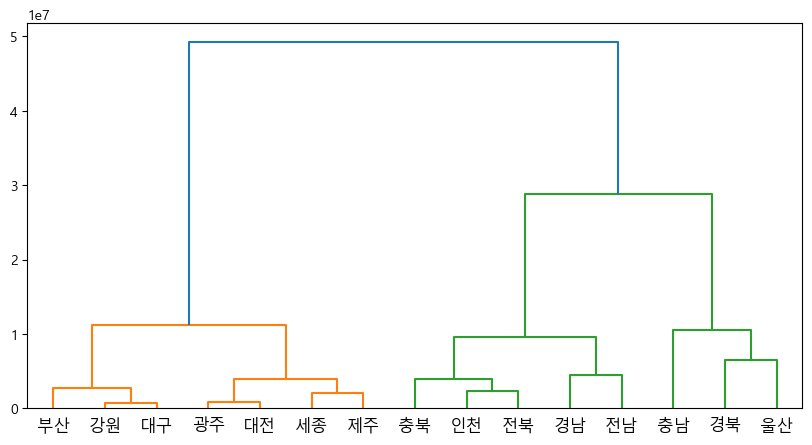

In [36]:
plt.figure(figsize=(10,5))
link_dist = linkage(power, metric='euclidean', method='ward')
dendrogram(link_dist, labels=power.index)
plt.show()

# 클러스터링 수행 p196
### k-means : 거리기반 군집화로 임의의 중심점에서 가까운 데이터를 군집화함

In [37]:
from sklearn.cluster import KMeans

In [38]:
kmeans = KMeans(n_clusters=4).fit(power)
print(kmeans.n_clusters)


4


c:\python\ml308\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [49]:
centers = kmeans.cluster_centers_
centers

array([[ 1.12104758,  1.85861879],
       [-1.25649503, -1.06099427],
       [ 0.75790833, -0.31260097],
       [-0.25141418,  0.52243609]])

In [39]:
kmeans.labels_

array([1, 2, 0, 3, 1, 3, 1, 3, 0, 2, 2, 2, 3, 0, 2])

In [40]:
power['클러스터'] = kmeans.labels_
power

C:\Users\lj040\AppData\Local\Temp\ipykernel_5864\387027277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power['클러스터'] = kmeans.labels_


,서비스업,제조업,클러스터
구분,,,
강원,6203749,6002286,1
경남,8667737,18053778,2
경북,8487402,30115601,0
광주,3174973,2910768,3
대구,5470438,5862633,1
대전,3955921,2608343,3
부산,7582169,7512588,1
세종,645424,1502922,3
울산,3649386,25883132,0


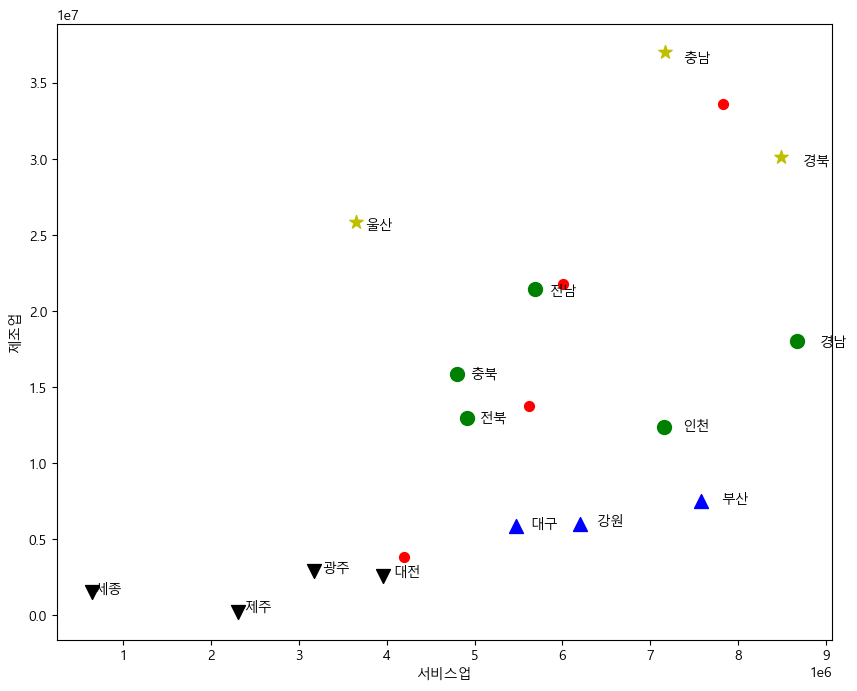

In [41]:
my_markers=['*','^','o','v']
my_color = ['y','b','g','k']
plt.figure(figsize=(10,8))
plt.xlabel('서비스업')
plt.ylabel('제조업')
for n in range(power.shape[0]) :
    label = kmeans.labels_[n]
    plt.scatter(power['서비스업'][n], power['제조업'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])
for i in range(kmeans.n_clusters) :
    plt.scatter(centers[i][0], centers[i][1], c='r', s=50)

In [17]:
power.shape[0]

15

In [18]:
from sklearn.preprocessing import StandardScaler as std

In [42]:
std_scaler = std()

In [43]:
power[['서비스업','제조업']] = std_scaler.fit_transform(power[['서비스업','제조업']])

C:\Users\lj040\AppData\Local\Temp\ipykernel_5864\1732125650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power[['서비스업','제조업']] = std_scaler.fit_transform(power[['서비스업','제조업']])


In [44]:
power

,서비스업,제조업,클러스터
구분,,,
강원,0.393992,-0.676282,1
경남,1.498349,0.431200,2
경북,1.417523,1.539632,0
광주,-0.963503,-0.960380,3
대구,0.065323,-0.689116,1
대전,-0.613482,-0.988171,3
부산,1.011798,-0.537491,1
세종,-2.097244,-1.089755,3
울산,-0.750871,1.150686,0


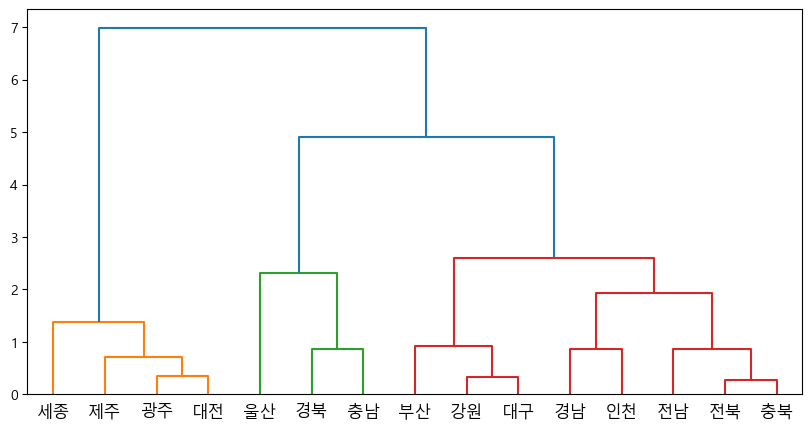

In [45]:
plt.figure(figsize=(10,5))
link_dist = linkage(power, metric='euclidean', method='ward')
dendrogram(link_dist, labels=power.index)
plt.show()

In [46]:
power

,서비스업,제조업,클러스터
구분,,,
강원,0.393992,-0.676282,1
경남,1.498349,0.431200,2
경북,1.417523,1.539632,0
광주,-0.963503,-0.960380,3
대구,0.065323,-0.689116,1
대전,-0.613482,-0.988171,3
부산,1.011798,-0.537491,1
세종,-2.097244,-1.089755,3
울산,-0.750871,1.150686,0


In [47]:
kmeans = KMeans(n_clusters=4).fit(power[['서비스업','제조업']])
print(kmeans.n_clusters)

4


c:\python\ml308\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [50]:
centers = kmeans.cluster_centers_
centers

array([[ 1.12104758,  1.85861879],
       [-1.25649503, -1.06099427],
       [ 0.75790833, -0.31260097],
       [-0.25141418,  0.52243609]])

c:\python\ml308\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\python\ml308\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


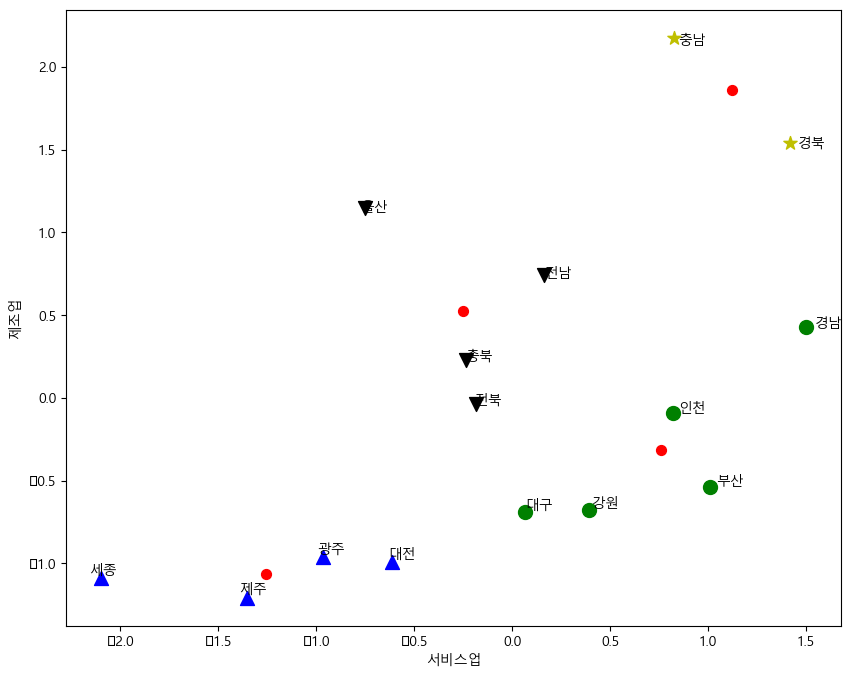

In [51]:
my_markers=['*','^','o','v']
my_color = ['y','b','g','k']
plt.figure(figsize=(10,8))
plt.xlabel('서비스업')
plt.ylabel('제조업')
for n in range(power.shape[0]) :
    label = kmeans.labels_[n]
    plt.scatter(power['서비스업'][n], power['제조업'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])
for i in range(kmeans.n_clusters) :
    plt.scatter(centers[i][0], centers[i][1], c='r', s=50)

### 모든 특성 데이터를 고려 

In [54]:
power3 = power_data.drop(['업무용합계','산업용합계'], axis=1)

In [55]:
power3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 강원 to 충북
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   주거용     15 non-null     int64
 1   공공용     15 non-null     int64
 2   서비스업    15 non-null     int64
 3   농림어업    15 non-null     int64
 4   광업      15 non-null     int64
 5   제조업     15 non-null     int64
 6   식료품제조   15 non-null     int64
 7   섬유,의류   15 non-null     int64
 8   목재,나무   15 non-null     int64
 9   펄프,종이   15 non-null     int64
 10  출판,인쇄   15 non-null     int64
 11  석유,화확   15 non-null     int64
 12  의료,광학   15 non-null     int64
 13  요업      15 non-null     int64
 14  1차금속    15 non-null     int64
 15  조립금속    15 non-null     int64
 16  기타기계    15 non-null     int64
 17  사무기기    15 non-null     int64
 18  전기기기    15 non-null     int64
 19  영상,음향   15 non-null     int64
 20  자동차     15 non-null     int64
 21  기타운송    15 non-null     int64
 22  가구및기타   15 non-null     int64
 23  재생재료    15 non-null  

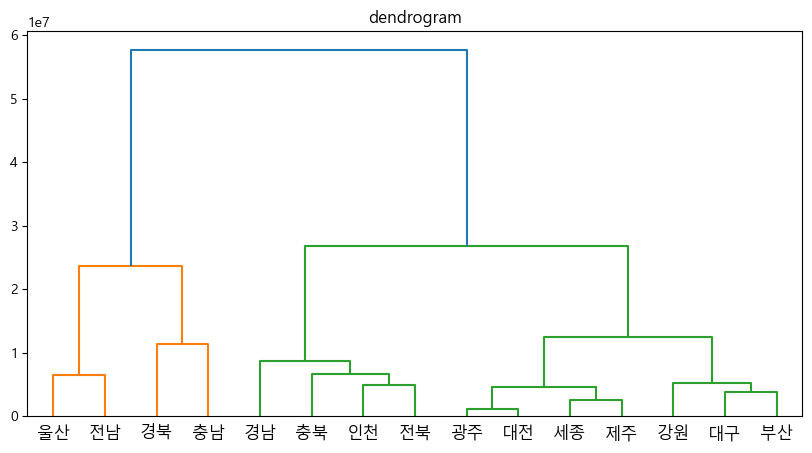

In [58]:
plt.figure(figsize=(10,5))
link_dist = linkage(power3, metric='euclidean', method='ward')
dendrogram(link_dist, labels=power.index)
plt.title("dendrogram")
plt.show()

c:\python\ml308\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\python\ml308\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


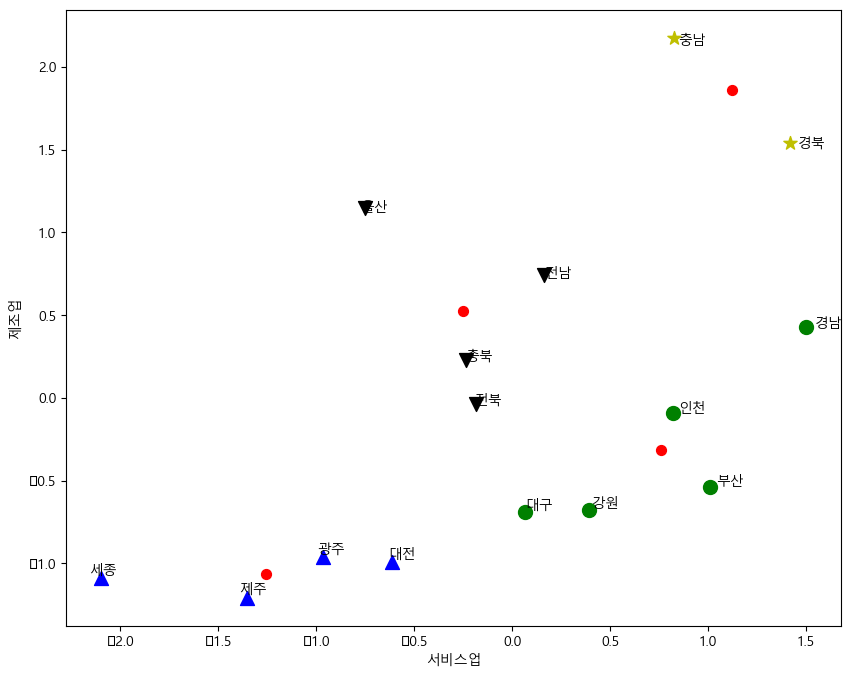

In [59]:
my_markers=['*','^','o','v']
my_color = ['y','b','g','k']
plt.figure(figsize=(10,8))
plt.xlabel('서비스업')
plt.ylabel('제조업')
for n in range(power3.shape[0]) :
    label = kmeans.labels_[n]
    plt.scatter(power['서비스업'][n], power['제조업'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])
for i in range(kmeans.n_clusters) :
    plt.scatter(centers[i][0], centers[i][1], c='r', s=50)

### DBSCAN : 밀도기반으로 가까이 있는 데이터를 군집화
#### 1)한 점(Core Point)을 기준점으로 변경내에 n개이상 데이터가 존재하면 군집화함 - 별도로 기준점을 주지 않음 : 코어 데이터
#### 2)군집에 속하지 않은 데이터를 기준점으로 군집화할때 코어데이터가 포함되면 기존 군집에 군집에 속하지 않은 데이터를 재군집화함 : 경계데이터
#### 3)더이상 군집이 안되면 종료

---
### hyper parameter : 사람이 임의의 파라미터값을 지정
### model parameter : 모델이 잘 작동하도록 학습하는 매개 변수
# 모델 학습 : 주어진 데이터에 가장 적합한 parameter를 찾는 작업으로 학습을 통해 찾음

In [60]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, DBSCAN

In [65]:
x,y = make_moons(n_samples=300, noise=0.05, random_state=11)

In [72]:
x[:10], y[:10]

(array([[ 0.09999454, -0.06140157],
        [-0.84634104,  0.72976933],
        [-0.22592098,  0.99424568],
        [ 1.2646073 , -0.39786026],
        [ 0.98061929,  0.19150151],
        [ 1.7194218 , -0.36355095],
        [ 1.70027338, -0.22218852],
        [ 0.64520759,  0.67619025],
        [ 0.5632047 , -0.41436822],
        [ 0.31995317,  0.90017433]]),
 array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0], dtype=int64))

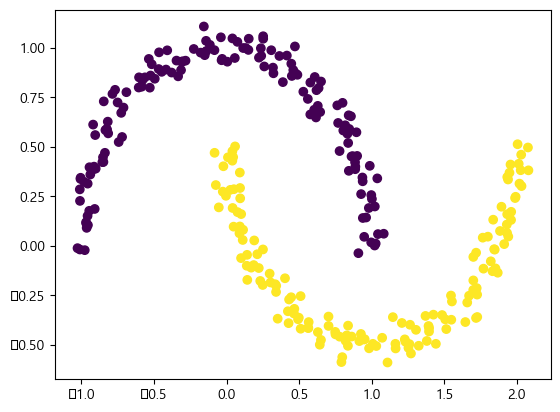

In [78]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [86]:
km = KMeans(n_clusters=2)

#### fit() : 학습
#### transform() : 학습결과변환
#### predict() : 학습모델로 예측

In [88]:
pred = km.fit_predict(x)

c:\python\ml308\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


c:\python\ml308\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


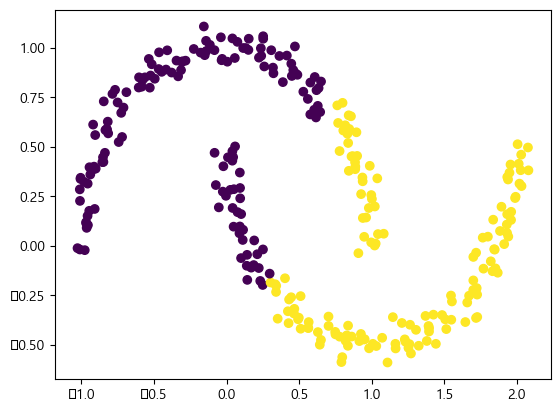

In [90]:
plt.scatter(x[:,0], x[:,1], c=pred)
plt.show()

### eps : 반경, min_smaples : 반경안에 샘플수, metrics:거리방법

In [93]:
db = DBSCAN(eps=0.2, min_samples=10, metric="euclidean")

In [94]:
db_pred = db.fit_predict(x)

c:\python\ml308\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


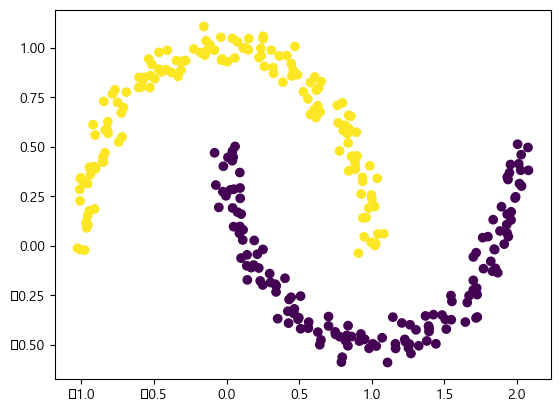

In [95]:
plt.scatter(x[:,0], x[:,1], c=db_pred)
plt.show()

c:\python\ml308\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


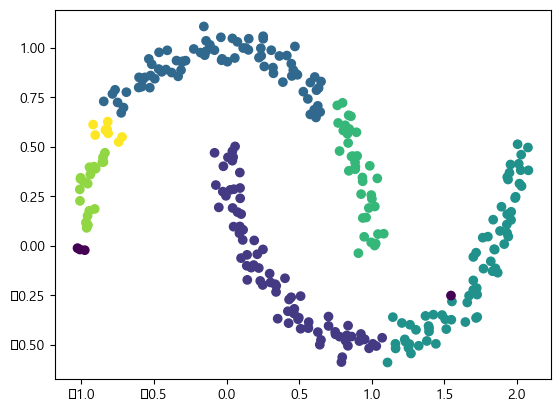

In [96]:
db = DBSCAN(eps=0.1, min_samples=5, metric="euclidean")
db_pred = db.fit_predict(x)
plt.scatter(x[:,0], x[:,1], c=db_pred)
plt.show()

c:\python\ml308\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


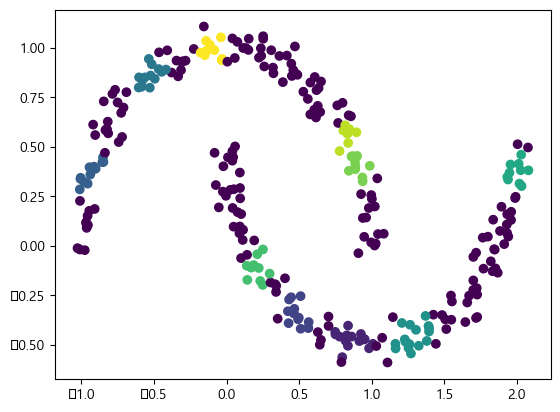

In [97]:
db = DBSCAN(eps=0.1, min_samples=10, metric="euclidean")
db_pred = db.fit_predict(x)
plt.scatter(x[:,0], x[:,1], c=db_pred)
plt.show()

c:\python\ml308\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


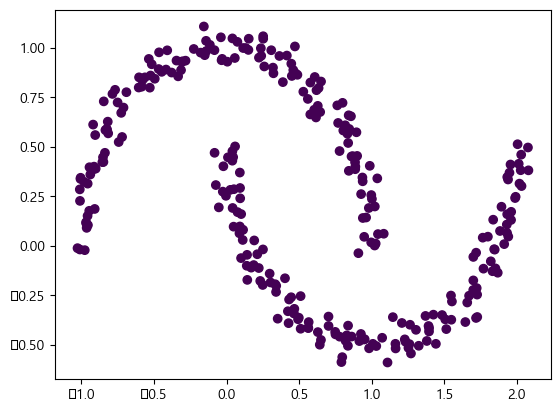

In [98]:
db = DBSCAN(eps=0.5, min_samples=5, metric="euclidean")
db_pred = db.fit_predict(x)
plt.scatter(x[:,0], x[:,1], c=db_pred)
plt.show()

c:\python\ml308\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


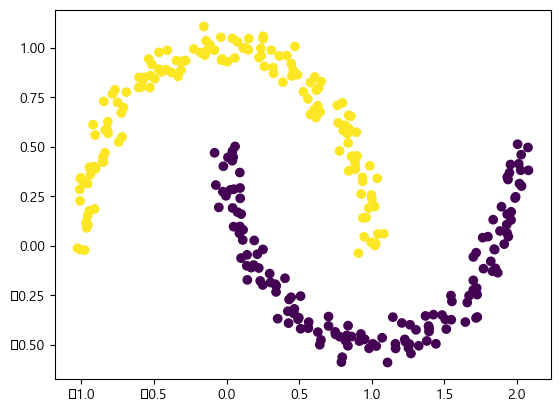

In [101]:
db = DBSCAN(eps=0.3, min_samples=6, metric="euclidean")
db_pred = db.fit_predict(x)
plt.scatter(x[:,0], x[:,1], c=db_pred)
plt.show()

In [103]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances, manhattan_distances

In [107]:
x = [[0,1],[1,1]]

### euclidean,manhattan : 두 변수간의 유사도로 거리 계산 (같을수록 1 다를수록 0) 

In [106]:
euclidean_distances(x,x)

array([[0., 1.],
       [1., 0.]])

In [108]:
cosine_distances(x,x)

array([[0.        , 0.29289322],
       [0.29289322, 0.        ]])

In [109]:
manhattan_distances(x,x)

array([[0., 1.],
       [1., 0.]])

In [116]:
from sklearn.datasets import make_blobs

### x,y = make_blobs(n_samples=샘플수, centers=군집수, n_features= 독립변수 반환 수이며 default 2, cluster_std=1,random_state=3) 

In [113]:
x,y = make_blobs(n_samples=1000, centers=3, n_features=10,cluster_std=1,random_state=3)

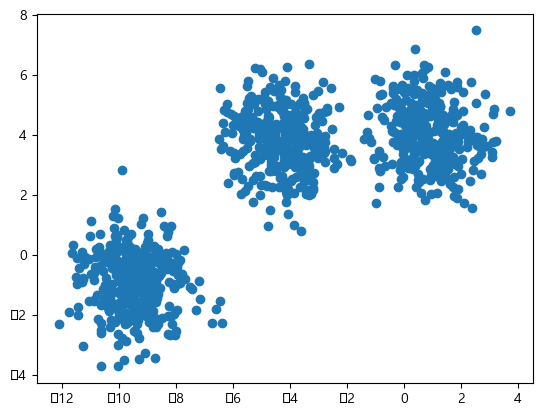

In [114]:
plt.scatter(x[:,0],x[:,1])
plt.show()

In [117]:
x.shape

(1000, 10)

In [118]:
from sklearn.cluster import KMeans,DBSCAN

In [119]:
kms = KMeans(n_clusters=3)

In [120]:
kms.fit(x)

c:\python\ml308\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [121]:
kms.labels_

array([2, 2, 2, 0, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 2, 1, 2, 2, 2, 0, 1, 1,
       0, 1, 2, 0, 1, 1, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 0, 2, 2, 1, 0,
       0, 1, 2, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 1,
       1, 2, 2, 1, 1, 2, 1, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0,
       1, 2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 0, 2, 1, 1,
       2, 0, 2, 2, 1, 2, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0, 1, 2, 2, 2, 1, 0,
       0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 1, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 1, 1, 0, 1, 0, 2, 2, 0, 0, 2, 2, 2,
       1, 0, 2, 0, 2, 0, 1, 0, 2, 1, 0, 1, 1, 2, 0, 0, 1, 1, 1, 2, 0, 1,
       2, 2, 2, 2, 0, 1, 1, 2, 2, 1, 0, 2, 0, 0, 2, 0, 0, 1, 2, 1, 2, 0,
       1, 1, 0, 1, 1, 2, 2, 1, 0, 0, 0, 2, 0, 0, 1, 1, 2, 1, 0, 2, 1, 2,
       2, 0, 1, 0, 2, 0, 1, 2, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 2, 2, 0, 0,
       0, 2, 2, 2, 1, 2, 0, 0, 0, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0,
       2, 1, 2, 0, 1, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1,

c:\python\ml308\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


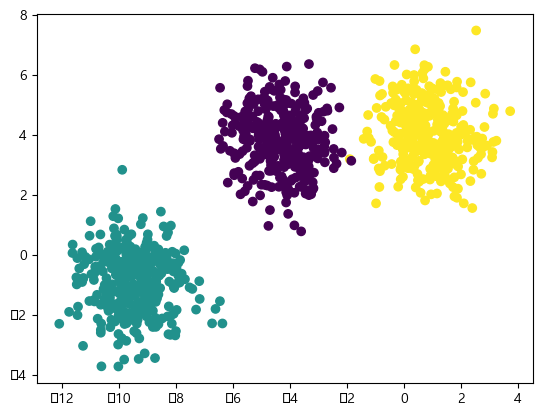

In [123]:
plt.scatter(x[:,0],x[:,1],c=kms.labels_)
plt.show()

c:\python\ml308\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\python\ml308\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


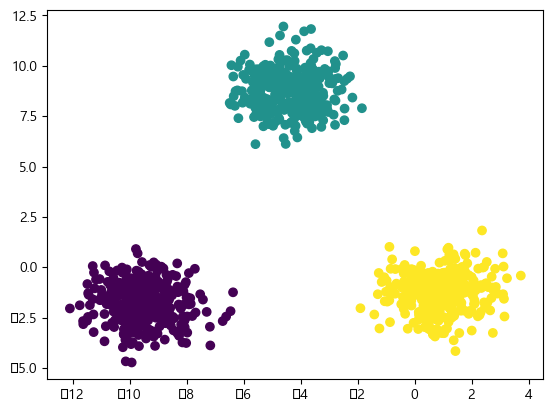

In [125]:
plt.scatter(x[:,0],x[:,9],c=kms.fit_predict(x))
plt.show()

c:\python\ml308\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


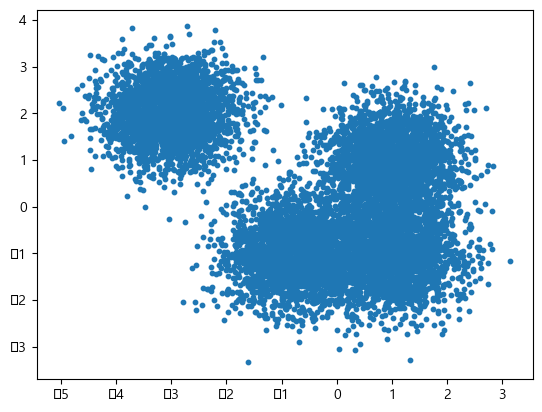

In [141]:
centers = [[1,1],[-.75,-1],[1,-1],[-3,2]]
x,y = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)
plt.scatter(x[:,0],x[:,1], s=10)
plt.show()

c:\python\ml308\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\python\ml308\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\python\ml308\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


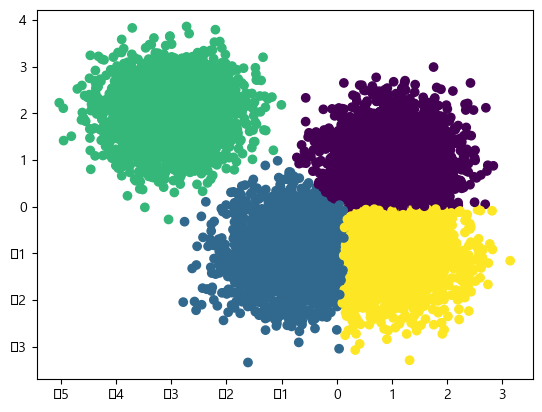

In [143]:
kms = KMeans(n_clusters=4)
label = kms.fit(x)
plt.scatter(x[:,0],x[:,1],c=kms.fit_predict(x))
plt.show()